Note: The gross revenue data is for US domestic only.

# First feedback from Abby

What I can look at is how did the preferences of the generes for movies changed before and after the pandemic.

I can look at x years previous of Covid and x years after Covid when the theatres were open. So drop all the movies that were launched during covid.

Then do the analysis.

# Project Structure for Analyzing Movie Genre Performance Before and After COVID-19:

### Objective:

Assess the financial performance of various movie genres before and after the onset of the COVID-19 pandemic.

### Data Collection:

Utilize the IMDb dataset to gather information on movies released in the years before and after the pandemic began (e.g., 2018-2019 for pre-COVID and 2020-2021 for post-COVID).
Focus on key data points like genre, box office earnings, budget, and release dates.
Analysis:

### Comparative Revenue Analysis: Compare the total and average box office revenues of different genres in both periods.
Genre Popularity Shifts: Identify any shifts in genre popularity. For example, did certain genres like horror or comedy become more popular post-COVID?
Budget vs. Revenue: Examine if there's a change in the budget-to-revenue ratio across genres before and after COVID-19.
Release Strategy Changes: Assess how release strategies (theatrical, streaming, hybrid) varied across genres and periods.

### Economic Theories and Models:

Apply microeconomic theories to explain changes in consumer preferences and market dynamics.
Consider demand and supply shifts due to external factors like lockdowns, economic uncertainty, and changes in consumer behavior.

### Results and Interpretation:

Present your findings in a clear, structured format.
Interpret the results in the context of economic theories and the unique circumstances of the pandemic.

### Conclusions:

Summarize key insights regarding the impact of COVID-19 on movie genre performance.
Discuss potential long-term implications for the film industry.

### Limitations and Further Research:

Acknowledge any limitations in your data or analysis.
Suggest areas for further research, such as a more detailed analysis of consumer preferences or the impact on independent films.
This project can offer a comprehensive view of how extraordinary events like a pandemic can influence entertainment industry trends, providing a practical application of economic concepts to real-world scenarios. Remember to keep your analysis aligned with the principles of microeconomics

Columns you should consider including in your analysis:

- Movie Title: The name of the movie. This is essential for identification and reference.

- Release Year: The year the movie was released. This will help you categorize movies into pre-COVID and post-COVID groups.

- Genre: The genre(s) of the movie. This is crucial for your primary analysis of comparing different genres.

- Box Office Revenue: The total earnings from ticket sales. This data is key to assessing financial performance.

- Budget: The estimated cost of producing the movie. This allows for analysis of profitability and budget-to-revenue ratios.

- Production Company: The company or companies that produced the movie. This can provide insights into market share and industry dynamics.

- Director and Key Cast Members: This information can be used to assess star power and its potential impact on a movie's success.

- IMDb Rating: Viewer ratings from IMDb. This can give a sense of critical reception and popularity.

- Number of Theaters Released In (if available): This data can help understand the scale of the release and its potential market reach.

- Streaming Platform Availability (post-COVID): For post-COVID movies, information on whether the movie was released on streaming platforms, and if so, which ones.

- Country/Countries of Origin: This helps in understanding geographical trends and the impact of regional COVID-19 measures.

- Runtime: The length of the movie, which can sometimes correlate with genre and audience preference.

- MPAA Rating/Censorship Rating: This information can provide insights into the target audience.

- Awards and Nominations: To gauge critical acclaim and its potential impact on financial success.

# Data Dictionary for combined_data dataset

(In progress)

# Data Processing and Cleaning

In [1]:
# Data

In [2]:
import pandas as pd
import os
import glob
import math
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd, DateOffset

In [3]:
os.chdir('/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5263 - Applied Microeconomics/Data Project/Data')

IMDb_title_basics = pd.read_csv('IMDb title basics.tsv', sep='\t', low_memory=False)
IMDb_Title_Principals = pd.read_csv('IMDb Title Principals.tsv', sep='\t', low_memory=False)
IMDb_title_ratings = pd.read_csv('IMDb title ratings.tsv', sep='\t', low_memory=False)
Name_Basics = pd.read_csv('Name Basics.tsv', sep='\t', low_memory=False)
title_akas = pd.read_csv('title.akas.tsv', sep='\t', low_memory=False)

------------

Columns you should consider including in your analysis:

- <font color='Green'>Movie Title: From IMDb_title_basics - primaryTitle</font>

- Release Year: </font>

- <font color='Green'>Genre: From IMDb_title_basics - genres</font>

- Box Office Revenue: </font>

- Budget: </font>

- Production Company: </font>

- <font color='Green'>Director and Key Cast Members: category From IMDb_Title_Principals</font>

- <font color='Green'>IMDb Rating: averageRating - From IMDb_title_ratings</font>

- Number of Theaters Released In (if available): </font>

- Streaming Platform Availability (post-COVID): </font>

- Country/Countries of Origin: </font>

- <font color='Green'>Runtime: From IMDb_title_basics - runtimeMinutes</font>

- MPAA Rating/Censorship Rating: </font>

- Awards and Nominations: </font>

<a name="_page0_x69.69_y423.22"></a>**IMDb Dataset Legend**

<Details>

Each dataset is contained in a gzipped, tab-separated-values (TSV) formatted file in the UTF-8 character set. The first line in each file contains headers that describe what is in each column. A ‘\N’ is used to denote that a particular field is missing or null for that title/name. The available datasets are as follows:

<a name="_page0_x60.71_y555.04"></a>**title.akas.tsv.gz**

- titleId (string) - a tconst, an alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- title (string) – the localized title
- region (string) - the region for this version of the title
- language (string) - the language of the title
- types (array) - Enumerated set of attributes for this alternative title. One or more of the following: "alternative", "dvd", "festival", "tv", "video", "working", "original", "imdbDisplay". New values may be added in the future without warning
- attributes (array) - Additional terms to describe this alternative title, not enumerated
- isOriginalTitle (boolean) – 0: not original title; 1: original title <a name="_page1_x60.71_y183.54"></a>**title.basics.tsv.gz**
- tconst (string) - alphanumeric unique identifier of the title
- titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
- primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
- originalTitle (string) - original title, in the original language
- isAdult (boolean) - 0: non-adult title; 1: adult title
- startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.002.png) endYear (YYYY) – TV Series end year. ‘\N’ for all other title types ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.003.png) runtimeMinutes – primary runtime of the title, in minutes ![](Aspose.Words.6ef9d709-0a24-4a63-90ff-a7a4701c44f5.004.png) genres (string array) – includes up to three genres associated with the title

<a name="_page1_x60.71_y549.05"></a>**title.crew.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- directors (array of nconsts) - director(s) of the given title
- writers (array of nconsts) – writer(s) of the given title

<a name="_page1_x60.71_y680.87"></a>**title.episode.tsv.gz**

- tconst (string) - alphanumeric identifier of episode
- parentTconst (string) - alphanumeric identifier of the parent TV Series
- seasonNumber (integer) – season number the episode belongs to
- episodeNumber (integer) – episode number of the tconst in the TV series

<a name="_page2_x60.71_y99.65"></a>**title.principals.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- ordering (integer) – a number to uniquely identify rows for a given titleId
- nconst (string) - alphanumeric unique identifier of the name/person
- category (string) - the category of job that person was in
- job (string) - the specific job title if applicable, else '\N'
- characters (string) - the name of the character played if applicable, else '\N'

<a name="_page2_x60.71_y321.35"></a>**title.ratings.tsv.gz**

- tconst (string) - alphanumeric unique identifier of the title
- averageRating – weighted average of all the individual user ratings
- numVotes - number of votes the title has received

<a name="_page2_x60.71_y453.18"></a>**name.basics.tsv.gz**

- nconst (string) - alphanumeric unique identifier of the name/person
- primaryName (string)– name by which the person is most often credited
- birthYear – in YYYY format
- deathYear – in YYYY format if applicable, else '\N'
- primaryProfession (array of strings)– the top-3 professions of the person
- knownForTitles (array of tconsts) – titles the person is known for

## Cleaning IMDb_title_basics

In [4]:
IMDb_title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


### All columns

- <font color='Green'>tconst: Keep </font>

- <font color='Green'>titleType: Keep</font>

- <font color='Green'>primaryTitle: Keep</font>

- <font color='Red'>originalTitle: Drop</font>

- <font color='Green'>isAdult: Keep</font>

- <font color='Red'>startYear: Drop</font>

- <font color='Red'>endYear: Drop</font>

- <font color='Green'>runtimeMinutes: Keep</font>

- <font color='Green'>genres: Keep</font>

In [5]:
# Dropping unnecessary columns
IMDb_title_basics = IMDb_title_basics.drop(['originalTitle', 'endYear', 'startYear'], axis=1)

# Filtering for movies only
IMDb_title_basics = IMDb_title_basics[IMDb_title_basics['titleType'] == 'movie']

In [6]:
# Creating isAdult as a dummy variable
IMDb_title_basics['isAdult'] = IMDb_title_basics['isAdult'].replace(0, 'No')

In [7]:
IMDb_title_basics.head()    # 81,487 rows  7 columns   1.2 MB

,tconst,titleType,primaryTitle,isAdult,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,0,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,0,100,"Documentary,News,Sport"
498,tt0000502,movie,Bohemios,0,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,0,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,0,90,Drama


--------

## Cleaning IMDb_Title_Principals

In [8]:
IMDb_Title_Principals.head()  # 3,911,728 rows  6 columns   1.1 GB

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


### All columns

- <font color='Green'>tconst: Keep</font>

- <font color='Green'>ordering: Keep</font>

- <font color='Green'>nconst: Keep</font>

- <font color='Green'>category: Keep</font>

- <font color='Red'>job: Drop</font>

- <font color='Red'>characters: Drop</font>

In [9]:
# Dropping unnecessary columns like job and characters
IMDb_Title_Principals = IMDb_Title_Principals.drop(['job', 'characters'], axis=1)

In [10]:
IMDb_Title_Principals.head()  # 3,911,728 rows  4 columns   1.1 GB

,tconst,ordering,nconst,category
0,tt0000001,1,nm1588970,self
1,tt0000001,2,nm0005690,director
2,tt0000001,3,nm0374658,cinematographer
3,tt0000002,1,nm0721526,director
4,tt0000002,2,nm1335271,composer


-----------

## Cleaning IMDb_title_ratings

In [11]:
IMDb_title_ratings.head()  # 1,058,804 rows  3 columns   27.5 MB   

,tconst,averageRating,numVotes
0,tt0000001,5.7,2007
1,tt0000002,5.8,270
2,tt0000003,6.5,1919
3,tt0000004,5.5,178
4,tt0000005,6.2,2696


----------

## Cleaning Name_Basics

In [12]:
Name_Basics.head()  # 9,007,366 rows  6 columns   1.1 GB

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0069467,tt0050986,tt0050976,tt0083922"


### All columns

- <font color='Green'>nconst: Keep</font>

- <font color='Green'>primaryName: Keep</font>

- <font color='Red'>birthYear: Drop</font>

- <font color='Red'>deathYear: Drop</font>

- <font color='Green'>primaryProfession: Keep</font>

- <font color='Green'>knownForTitles: Keep</font>

In [13]:
# dropping unnecessary columns like birthYear, deathYear
Name_Basics = Name_Basics.drop(['birthYear', 'deathYear'], axis=1)

In [14]:
Name_Basics.head()  # 9,007,366 rows  4 columns   1.1 GB

,nconst,primaryName,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,"actress,soundtrack,music_department","tt0049189,tt0057345,tt0056404,tt0054452"
3,nm0000004,John Belushi,"actor,soundtrack,writer","tt0080455,tt0078723,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,"writer,director,actor","tt0069467,tt0050986,tt0050976,tt0083922"


----------

## Cleaning title_akas

In [15]:
title_akas.head()   # 30,000,000 rows  8 columns   2.5 GB

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


### All columns

- <font color='Green'>titleId: Keep</font>

- <font color='Green'>ordering: Keep</font>

- <font color='Red'>title: Drop</font>

- <font color='Green'>region: Keep</font>

- <font color='Green'>language: Keep</font>

- <font color='Green'>types	: Keep</font>

- <font color='Red'>attributes: Drop</font>

- <font color='Red'>isOriginalTitle: Drop</font>

In [16]:
# dropping unnecessary columns like title, isOriginalTitle and attributes
title_akas = title_akas.drop(['title', 'isOriginalTitle', 'attributes'], axis=1)

# rename the titleId column to tconst
title_akas = title_akas.rename(columns={'titleId': 'tconst'})

In [17]:
title_akas.head()   # 30,000,000 rows  5 columns   2.5 GB

,tconst,ordering,region,language,types
0,tt0000001,1,UA,\N,imdbDisplay
1,tt0000001,2,DE,\N,\N
2,tt0000001,3,HU,\N,imdbDisplay
3,tt0000001,4,GR,\N,imdbDisplay
4,tt0000001,5,RU,\N,imdbDisplay


# merging IMDb dataset

In [18]:
# Merge title basics with ratings on 'tconst'
merged_df = pd.merge(IMDb_title_basics, IMDb_title_ratings[['tconst', 'averageRating']], on='tconst', how='left')

# Merge with akas to get 'region', then group by 'tconst' to combine regions into a list
regions_df = title_akas.groupby('tconst')['region'].apply(lambda x: ', '.join(x.dropna().astype(str).unique())).reset_index()

# Merge with regions
merged_df = pd.merge(merged_df, regions_df, on='tconst', how='left')

# Merge with principals to get 'nconst'
principals_df = pd.merge(merged_df, IMDb_Title_Principals[['tconst', 'nconst']], on='tconst', how='left')

# Merge principals with name basics to get 'primaryName' and 'primaryProfession'
# Instead of exploding 'knownForTitles', we join them into a single string
Name_Basics['knownForTitles'] = Name_Basics['knownForTitles'].apply(lambda x: ','.join(map(str, x)))

# Then merge to get the names and professions associated with each 'nconst'
principals_with_names = pd.merge(principals_df, Name_Basics[['nconst', 'primaryName', 'primaryProfession', 'knownForTitles']], on='nconst', how='left')

# Filter for rows where 'primaryProfession' contains 'director'
directors_df = principals_with_names[principals_with_names['primaryProfession'].str.contains('director', na=False)]

# Group by 'tconst' and aggregate 'primaryName' into a list for director entries
director_names_df = directors_df.groupby('tconst')['primaryName'].apply(lambda x: ', '.join(x.dropna().astype(str).unique())).reset_index()

# Merge the director names with the directors dataframe
directors_df = pd.merge(directors_df, director_names_df, on='tconst', how='left', suffixes=('', '_directors'))

# Now select only the columns specified and rename 'primaryName_directors' back to 'primaryName'
directors_df = directors_df[['titleType', 'primaryTitle', 'genres', 'primaryName_directors', 'primaryProfession', 'averageRating', 'region', 'runtimeMinutes', 'isAdult', 'tconst']]
directors_df = directors_df.rename(columns={"primaryName_directors": "primaryName"})

# Group by the necessary columns and aggregate to combine regions into a list
IMDb_df = directors_df.groupby(['titleType', 'primaryTitle', 'genres', 'primaryName', 'primaryProfession', 'averageRating', 'runtimeMinutes', 'isAdult', 'tconst']).agg({'region': lambda x: ', '.join(str(i) for i in x)}).reset_index()

# In final_df keeping only one of the values where the primaryTitle and averageRating are the same for multiple rows.
IMDb_df = IMDb_df.drop_duplicates(subset=['primaryTitle', 'averageRating'], keep='first') 

In [19]:
IMDb_df.head()

,titleType,primaryTitle,genres,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,region
0,movie,!Women Art Revolution,Documentary,Lynn Hershman-Leeson,"director,producer,writer",6.8,83,0,tt1699720,"XWW, RU, GB, \N, US"
1,movie,#1 Serial Killer,Horror,"Jason Tobin, Shoshana Bush, Stanley Yung, Quen...","actor,director,writer",5.7,87,0,tt2346170,"\N, US"
5,movie,#5,"Biography,Comedy,Fantasy",Ricky Bardy,"producer,director,editor",5.0,68,0,tt3120962,"\N, US"
6,movie,#50Fathers,Comedy,"Joddy Eric Matthews, Denny Castiglione, Jay B....","actor,producer,assistant_director",4.3,132,0,tt4470336,"\N, US"
10,movie,#66,Action,Asun Mawardi,"producer,director,writer",5.6,116,0,tt5255986,"GB, ID, \N"


In [20]:
IMDb_df.count()

titleType            293497
primaryTitle         293497
genres               293497
primaryName          293497
primaryProfession    293497
averageRating        293497
runtimeMinutes       293497
isAdult              293497
tconst               293497
region               293497
dtype: int64

# The final IMDb dataset name is <span style="color:Red">merged_IMDb_df</span> 

-------

## Testing

In [21]:
# filter merged_df primaryTitle for Avengers
avengers_df = IMDb_df[IMDb_df['primaryTitle'].str.contains('Avengers: Endgame', case=False, na=False)]
avengers_df.head()

,titleType,primaryTitle,genres,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,region
59330,movie,Avengers: Endgame,"Action,Adventure,Drama","Anthony Russo, Joe Russo","producer,director,writer",8.4,181,0,tt4154796,"TW, AU, UA, US, SG, HR, KR, CL, EE, BG, IT, MX..."


In [22]:
avengers_df.count()

titleType            1
primaryTitle         1
genres               1
primaryName          1
primaryProfession    1
averageRating        1
runtimeMinutes       1
isAdult              1
tconst               1
region               1
dtype: int64

In [23]:
# # export avengers_df to csv
# avengers_df.to_csv('avengers_df.csv', index=False)

----------

# Revenues dataset below
---------

In [138]:
# Define the path to the files
path_to_files = '/Users/shreyashgupta/Library/CloudStorage/OneDrive-UniversityofArkansas/MSEA/ECON 5813 - Economic Analytics I/Project Proposal/Data/Gross Data/'

# Initialize an empty DataFrame for the Revenues_dataset
Revenues_dataset = pd.DataFrame()

# Define a helper function to extract the year from the filename
def get_year_from_filename(file_name):
    for month in ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]:
        if month in file_name:
            return file_name.split(month)[1].strip('.csv').strip()
    return None

# Loop through each CSV file in the directory
for file_name in os.listdir(path_to_files):
    if file_name.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(path_to_files, file_name)
        # Read the CSV file into a temporary DataFrame
        temp_df = pd.read_csv(file_path)
        # Extract the year from the file name
        year = get_year_from_filename(file_name)
        if year:
            # Assume that 'Release Date' column contains the day and abbreviated month (e.g., '17-Feb')
            # If day is missing, we'll prepend '01-' to use as a placeholder
            temp_df['Release Date'] = temp_df['Release Date'].str.extract(r'(\d+)-[A-Za-z]+', expand=False).fillna('01') + '-' + temp_df['Release Date'].str.extract(r'(\d+-)?([A-Za-z]+)', expand=False)[1] + '-' + year
            # Convert 'Release Date' to datetime format
            temp_df['Release Date'] = pd.to_datetime(temp_df['Release Date'], format='%d-%b-%Y', errors='coerce')
            # Drop rows where 'Release Date' could not be parsed
            temp_df.dropna(subset=['Release Date'], inplace=True)
            # Format 'Release Date' as 'MM/YYYY'
            temp_df['Release Date'] = temp_df['Release Date'].dt.strftime('%m/%Y')
            # Append to the main DataFrame
            Revenues_dataset = pd.concat([Revenues_dataset, temp_df], ignore_index=True)

# Remove rows with NaN 'Release Date' before dropping duplicates
Revenues_dataset.dropna(subset=['Release Date'], inplace=True)

# Drop duplicates based on the 'Release' column
Revenues_dataset = Revenues_dataset.drop_duplicates(subset='Release')

# Drop the unnecessary 'Rank' and 'Gross' columns
Revenues_dataset.drop(['Rank', 'Gross'], axis=1, inplace=True)

# Drop rows with null values in 'Total Gross'
Revenues_dataset = Revenues_dataset.dropna(subset=['Total Gross'])

Revenues_dataset.head()

,Release,Theaters,Total Gross,Release Date,Distributor
0,It Chapter Two,"4,570","$211,593,228",09/2019,Warner Bros.
1,Hustlers,"3,525","$104,963,598",09/2019,STX Entertainment
2,Downton Abbey,"3,548","$96,853,865",09/2019,Focus Features
3,Ad Astra,"3,460","$50,188,370",09/2019,Twentieth Century Fox
4,Rambo: Last Blood,"3,618","$44,819,352",09/2019,Lions Gate Films


# The final Revenues and Distributor dataset name is <span style="color:Red">Revenues_dataset</span> 

------

## Testing

In [440]:
# filter merged_df primaryTitle for Avengers
avengers_df_31 = Revenues_dataset[Revenues_dataset['Release'].str.contains('Avengers: Endgame', case=False, na=False)]
avengers_df_31.head()

,Release,Theaters,Total Gross,Release Date,Distributor
90,Avengers: Endgame,"4,662","$858,373,000",04/2019,Walt Disney Studios Motion Pictures


-------

# Merging <span style="color:SkyBlue">IMDb_df</span> and <span style="color:SkyBlue">Revenues_dataset</span>

In [441]:
# Merge IMDb_df's column called primaryTitle with Revenues_dataset's column called Release
combined_data = pd.merge(IMDb_df, Revenues_dataset, left_on='primaryTitle', right_on='Release', how='left')

In [442]:
# Delete duplicate rows where the Release and Total gross match other rows
combined_data = combined_data.drop_duplicates(subset=['Release', 'Total Gross'], keep='first')

# filter combined_data if US is not in the region column
combined_data = combined_data[combined_data['region'].str.contains('US', case=False, na=False)]

# Remove null values from Release Date column
combined_data = combined_data.dropna(subset=['Release Date'])

# Duplicate the genre column
combined_data['genre'] = combined_data['genres']

# In Genres column delete all the generes except the first one
combined_data['genres'] = combined_data['genres'].str.split(',', expand=True)[0]

# Cleaning the format type for Total Gross
combined_data['Total Gross'] = combined_data['Total Gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Reset the index
combined_data = combined_data.reset_index(drop=True)

In [443]:
# all unique values in isAdult column
combined_data['isAdult'].unique()

array(['0', '1'], dtype=object)

In [444]:
# Replace 'True' with 1
combined_data['isAdult'] = combined_data['isAdult'].replace(True, 1)

# Replace null values with 0
combined_data['isAdult'] = combined_data['isAdult'].fillna(0)


In [445]:
# Changing data types
combined_data['runtimeMinutes'] = pd.to_numeric(combined_data['runtimeMinutes'], errors='coerce').astype('Int64')
combined_data['Theaters'] = pd.to_numeric(combined_data['Theaters'], errors='coerce').astype('Int64')
combined_data['Release Date'] = pd.to_datetime(combined_data['Release Date'], errors='coerce', format='%b-%y')

In [446]:
# separating the genres column into different columns
combined_data = combined_data.join(combined_data.pop('genres').str.get_dummies(sep=','))
combined_data.head()

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,region,Release,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,\N
0,movie,'71,"Sean Harris, Yann Demange, Robin Gutch","actor,writer,director",7.2,99,0,tt2614684,"UY, CZ, NL, FI, GB, AU, CN, IN, ES, XWW, DK, \...",'71,...,0,0,0,0,0,0,0,0,0,0
1,movie,'83,"Kabir Khan, Sumit Arora, Vasan Bala, Sanjay Pu...","director,writer,actor",7.5,162,0,tt7518786,"AR, \N, NZ, TR, IN, CN, CA, AE, PT, FR, ID, XW...",'83,...,0,0,0,0,0,0,0,0,0,0
2,movie,'85: The Greatest Team in Football History,Scott Prestin,"producer,director,actor",6.8,90,0,tt4417402,"\N, GB, US",'85: The Greatest Team in Football History,...,0,0,0,0,0,0,0,0,0,0
3,movie,"1,000 Times Good Night","Erik Poppe, Kirsten Sheridan","director,producer,cinematographer",7.0,117,0,tt2353767,"JP, MX, HR, SE, VE, TR, AR, ES, BG, CL, \N, FI...","1,000 Times Good Night",...,0,0,0,0,0,0,0,0,0,0
4,movie,10 Cloverfield Lane,"Dan Trachtenberg, Damien Chazelle","music_department,director,writer",7.2,103,0,tt1179933,"SG, RO, CN, SI, CL, GR, SE, PT, VN, BG, UY, GB...",10 Cloverfield Lane,...,0,0,0,0,0,0,0,0,0,0


In [447]:
# # Grouping the media companies into the companies they are owned by or the companies by themselves.
# distributor_to_parent_map = {
#     "Universal Pictures": "Comcast",
#     "Focus Features": "Comcast",
#     "Paramount Pictures": "Paramount",
#     "Lions Gate Films": "LionsGate",
#     "Twentieth Century Fox": "Walt Disney",
#     "Warner Bros.": "Warner Bros Discovery",
#     "Sony Pictures Entertainment (SPE)": "Sony",
#     "TriStar Pictures": "Sony",
#     "Screen Gems": "Sony",
#     "Walt Disney Studios Motion Pictures": "Walt Disney",
#     "Sony Pictures Classics": "Sony",
#     "The Samuel Goldwyn Company": "Amazon",
#     "UTV Motion Pictures": "Walt Disney",
#     "CBS Films": "Paramount",
#     "Amazon Studios": "Amazon",
#     "20th Century Studios": "Walt Disney",
#     "Searchlight Pictures": "Walt Disney",
#     "Columbia Pictures": "Sony",
#     "Netflix": "Netflix",
#     "DreamWorks": "Paramount",
#     "Metro-Goldwyn-Mayer (MGM)": "Amazon",
#     "Crunchyroll": "Sony",
#     "Roadside Attractions": "LionsGate",
#     "Pure Flix Entertainment": "Sony",
#     "Blue Sky Cinema": "Walt Disney",
#     "FUNimation Entertainment": "Sony",
#     "The Orchard": "Sony",
#     "Pantelion Films": "LionsGate",
#     "Affirm Films": "Sony",
#     "Orion Pictures": "Amazon",
#     "National Geographic Entertainment": "Walt Disney",
#     "United Artists Releasing": "Amazon",
#     "Entertainment One": "LionsGate",
#     "Saban Films": "Walt Disney"
# }

# # Applying the mapping to the 'Distributor' column
# combined_data['Distributor'] = combined_data['Distributor'].map(distributor_to_parent_map).fillna(combined_data['Distributor'])

In [448]:
combined_data.count()

titleType            5423
primaryTitle         5423
primaryName          5423
primaryProfession    5423
averageRating        5423
runtimeMinutes       5384
isAdult              5423
tconst               5423
region               5423
Release              5423
Theaters             4237
Total Gross          5423
Release Date            0
Distributor          5423
genre                5423
Action               5423
Adult                5423
Adventure            5423
Animation            5423
Biography            5423
Comedy               5423
Crime                5423
Documentary          5423
Drama                5423
Family               5423
Fantasy              5423
Film-Noir            5423
History              5423
Horror               5423
Music                5423
Musical              5423
Mystery              5423
Romance              5423
Sci-Fi               5423
Sport                5423
Thriller             5423
\N                   5423
dtype: int64

In [449]:
combined_data.tail()

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,region,Release,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,\N
5418,movie,¡Que viva México!,"Salvador Parra, Luis Estrada","production_designer,art_director,art_department",5.5,191,0,tt22185848,"FR, EG, IN, AU, PH, JP, NL, GB, PL, TH, KR, \N...",¡Que viva México!,...,0,0,0,0,0,0,0,0,0,0
5419,movie,¡Viva Maestro!,"Richard Pearce, Ted Braun","director,cinematographer,producer",7.2,99,0,tt14153448,"CA, \N, US, BR, TR",¡Viva Maestro!,...,0,0,0,0,0,0,0,0,0,0
5420,movie,¿Y cómo es él?,"Mauricio Ochmann, Ariel Winograd, Kim Tai-sik","actor,producer,director",5.5,95,0,tt8928230,"MX, \N, CA, US, EC, ES",¿Y cómo es él?,...,0,0,0,0,0,0,0,0,0,0
5421,movie,Ága,"Agi Ariunsaichan Dawaachu, Milko Lazarov","producer,actor,director",7.2,96,0,tt7909444,"DE, BG, \N, FR, IT, US, RU, AT, PL, GR, XWW, G...",Ága,...,0,0,0,0,0,0,0,0,0,0
5422,movie,Évolution,"Lucile Hadzihalilovic, Alante Kavaite","director,writer,editor",5.9,81,0,tt4291590,"IT, PT, SE, RU, SG, GB, JP, XWW, RS, \N, NO, T...",Évolution,...,0,0,0,0,0,0,0,0,0,0


In [450]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5423 entries, 0 to 5422
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   titleType          5423 non-null   object        
 1   primaryTitle       5423 non-null   object        
 2   primaryName        5423 non-null   object        
 3   primaryProfession  5423 non-null   object        
 4   averageRating      5423 non-null   float64       
 5   runtimeMinutes     5384 non-null   Int64         
 6   isAdult            5423 non-null   object        
 7   tconst             5423 non-null   object        
 8   region             5423 non-null   object        
 9   Release            5423 non-null   object        
 10  Theaters           4237 non-null   Int64         
 11  Total Gross        5423 non-null   float64       
 12  Release Date       0 non-null      datetime64[ns]
 13  Distributor        5423 non-null   object        
 14  genre   

In [451]:
combined_data.columns

Index(['titleType', 'primaryTitle', 'primaryName', 'primaryProfession',
       'averageRating', 'runtimeMinutes', 'isAdult', 'tconst', 'region',
       'Release', 'Theaters', 'Total Gross', 'Release Date', 'Distributor',
       'genre', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Sport', 'Thriller', '\N'],
      dtype='object')

# Exploratory Data Analysis

### Summary Statistics

In [452]:
# Summary statistics for combined_data
combined_data.describe(include='all')

,titleType,primaryTitle,primaryName,primaryProfession,averageRating,runtimeMinutes,isAdult,tconst,region,Release,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,\N
count,5423,5423,5423,5423,5423.000000,5384.0,5423,5423,5423,5423,...,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000,5423.000000
unique,1,5423,5308,519,NaN,<NA>,2,5423,5044,5423,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,movie,'71,"Frederick Wiseman, John Davey","actor,producer,director",NaN,<NA>,0,tt2614684,"\N, US",'71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5423,1,4,589,NaN,<NA>,5407,1,85,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.422939,105.022474,NaN,NaN,NaN,NaN,...,0.000184,0.023788,0.002213,0.002397,0.001660,0.001475,0.000553,0.000369,0.003319,0.000369
min,NaN,NaN,NaN,NaN,1.500000,44.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,5.800000,91.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,6.600000,101.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,7.200000,115.0,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,NaN,NaN,NaN,9.600000,808.0,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visualizing the data

In [453]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5423 entries, 0 to 5422
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   titleType          5423 non-null   object        
 1   primaryTitle       5423 non-null   object        
 2   primaryName        5423 non-null   object        
 3   primaryProfession  5423 non-null   object        
 4   averageRating      5423 non-null   float64       
 5   runtimeMinutes     5384 non-null   Int64         
 6   isAdult            5423 non-null   object        
 7   tconst             5423 non-null   object        
 8   region             5423 non-null   object        
 9   Release            5423 non-null   object        
 10  Theaters           4237 non-null   Int64         
 11  Total Gross        5423 non-null   float64       
 12  Release Date       0 non-null      datetime64[ns]
 13  Distributor        5423 non-null   object        
 14  genre   

In [454]:
# # Drop rows with NaN values in 'Total Gross' column
# combined_data1 = combined_data.dropna(subset=['Total Gross'])

# # Now create the bins
# bins = range(0, int(combined_data1['Total Gross'].count()) + 10000)
# combined_data1['Total Gross bins'] = pd.cut(combined_data1['Total Gross'], bins=bins, include_lowest=True)

# counts = combined_data1['Total Gross bins'].value_counts().sort_index()

# plt.figure(figsize=(10,6))
# plt.bar(counts.index.astype(str), counts.values)
# plt.xlabel('Total Gross')
# plt.ylabel('Count')
# plt.title('Distribution of Total Gross')
# plt.show()

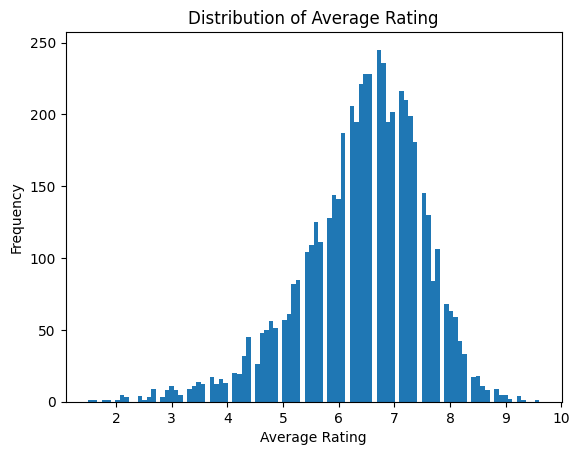

In [455]:
# Visualise the distribution of the average rating
plt.hist(combined_data['averageRating'], bins=100)
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Average Rating')
plt.show()

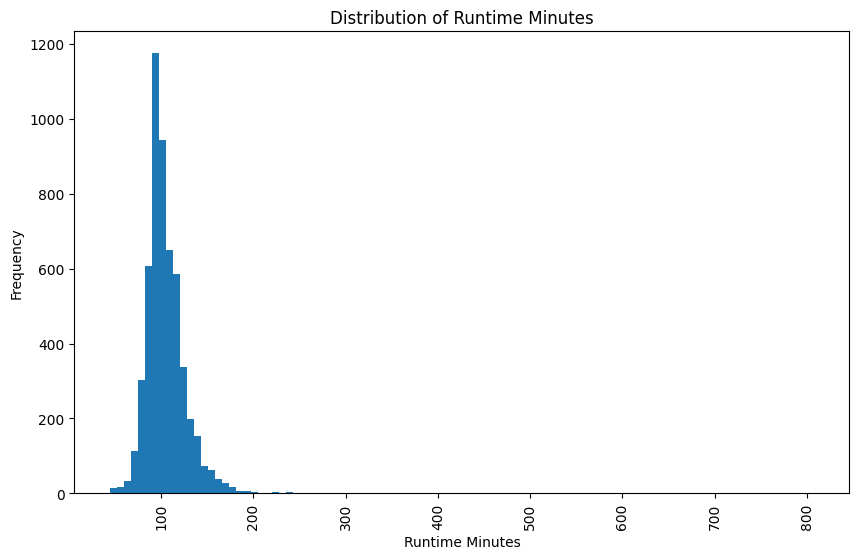

In [456]:
# Histogram of Runtime Minutes
plt.figure(figsize=(10,6))
plt.hist(combined_data['runtimeMinutes'].dropna(), bins=100)
plt.xlabel('Runtime Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Runtime Minutes')
plt.xticks(rotation='vertical')
plt.show()


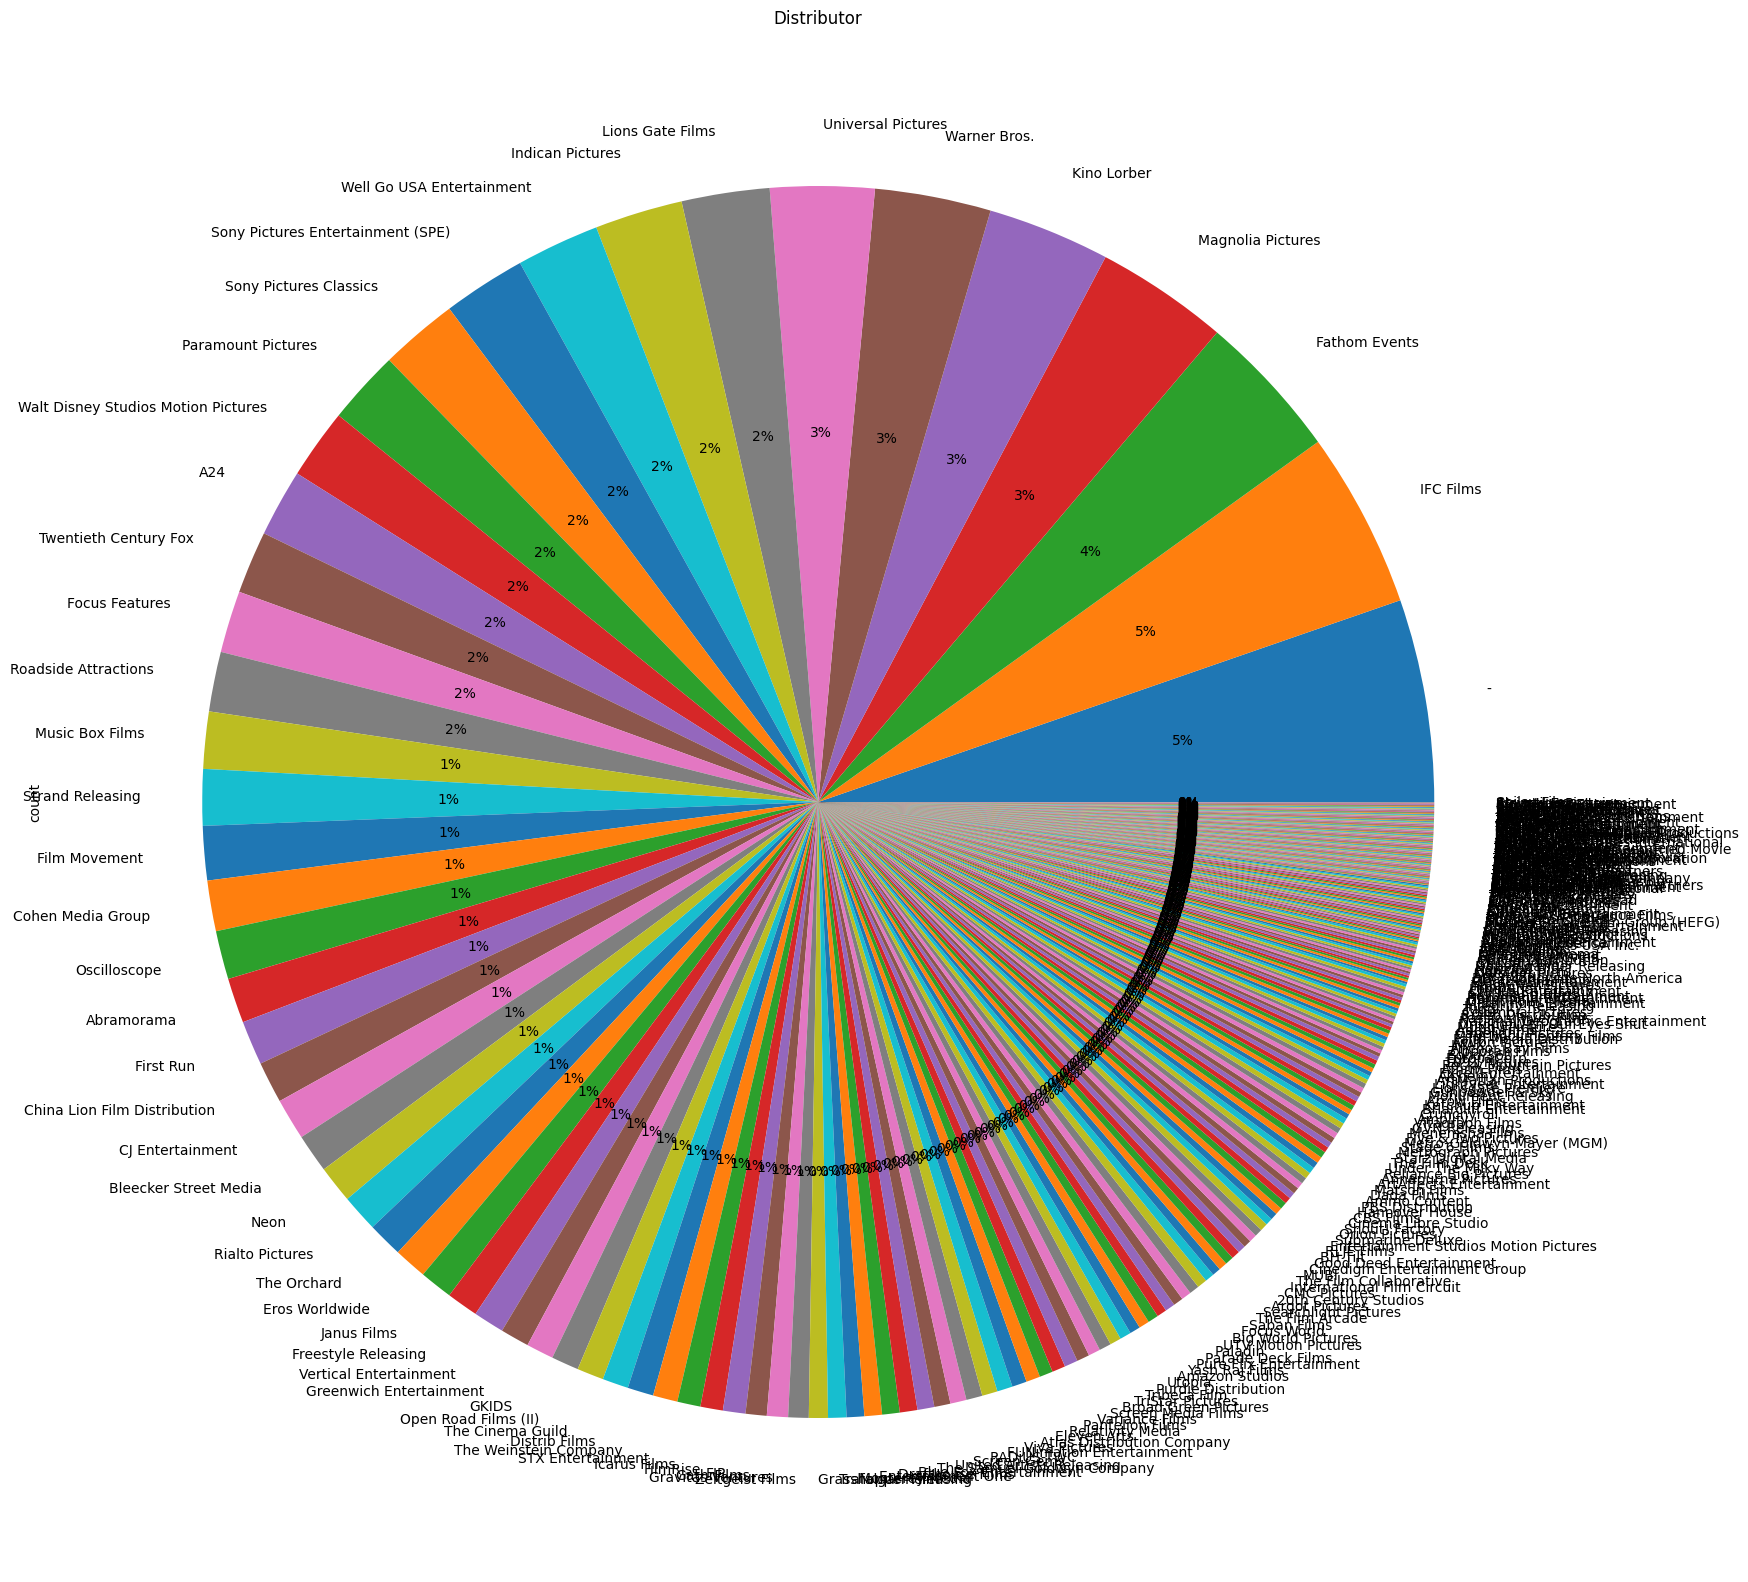

In [457]:
# Visualise a pie chart of the count of all the distributors
combined_data['Distributor'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(20,20))
plt.title('Distributor')
plt.show()

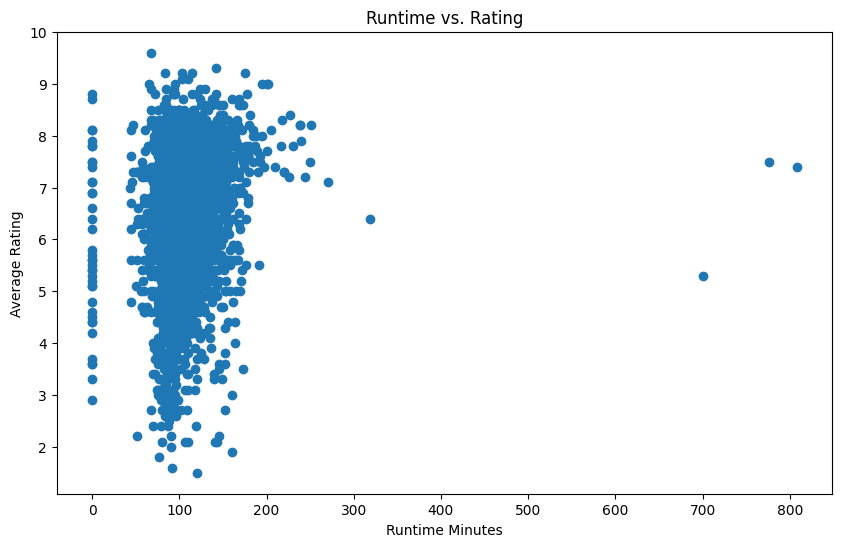

In [458]:
# Scatter Plot of Runtime vs. Rating
plt.figure(figsize=(10,6))
plt.scatter(combined_data['runtimeMinutes'].fillna(0), combined_data['averageRating'])
plt.xlabel('Runtime Minutes')
plt.ylabel('Average Rating')
plt.title('Runtime vs. Rating')
plt.show()

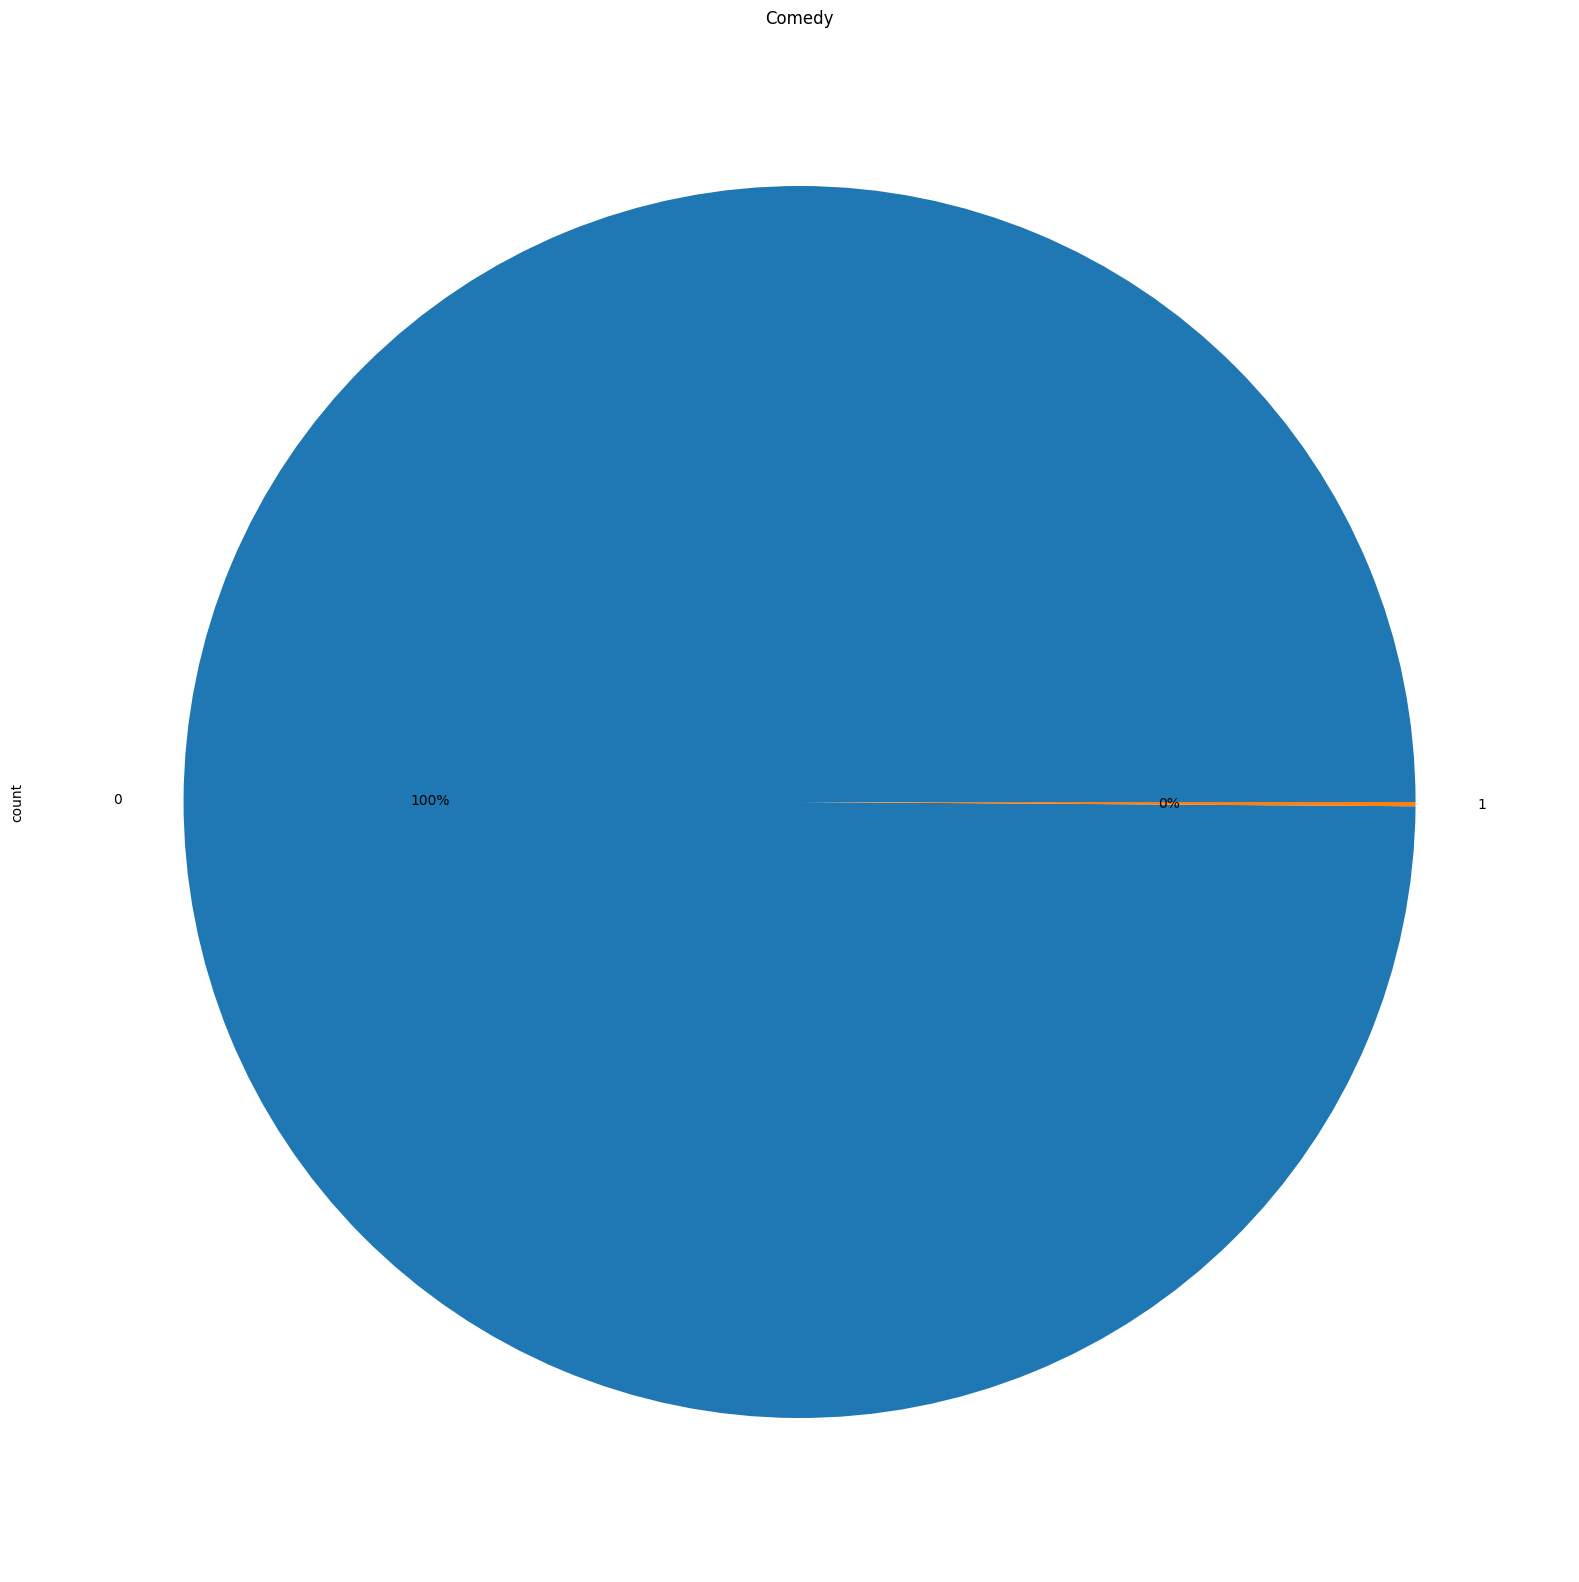

In [459]:
# Pie Chart for comedy Genre Distribution
combined_data['Family'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(20,20))
plt.title('Comedy')
plt.show()

<Figure size 1000x600 with 0 Axes>

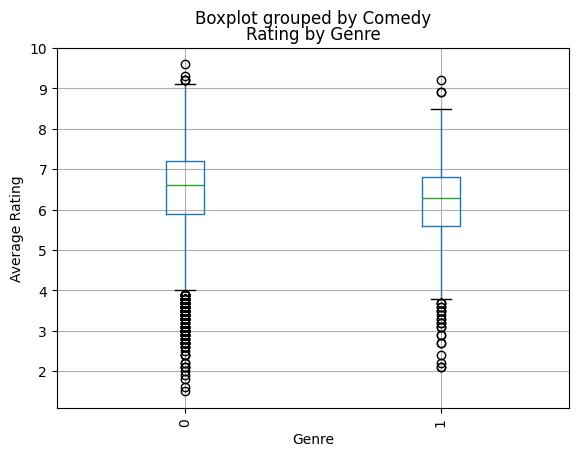

In [461]:
# Box Plot of Ratings by Genres
plt.figure(figsize=(10,6))
combined_data.boxplot(column='averageRating', by='Comedy', rot=90)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Rating by Genre')
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

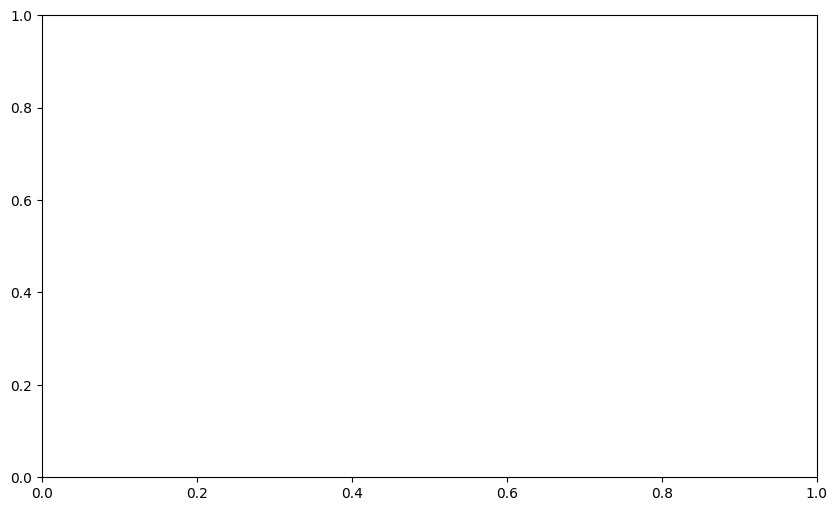

In [466]:
# Bubble Chart of Gross Revenue vs. Rating Size by Theater Count:
plt.figure(figsize=(10,6))
plt.scatter(combined_data['Total Gross'], combined_data['averageRating'], s=combined_data['Theaters'] * 10, alpha=0.5)
plt.xlabel('Total Gross')
plt.ylabel('Average Rating')
plt.xticks(rotation='vertical')
plt.title('Gross Revenue vs. Rating Size by Theater Count')
plt.show()



# Hypothesis Formulation

I believe that before covid 

# Data Analysis

# Interpretation and Conclusion

### Data courtesy of IMDb